## Using the titanic data, in your classification-exercises repository, create a notebook, decision_tree.ipynb where you will do the following:

In [1]:
import pydataset
from env import get_db_url

import pandas as pd
import numpy as np

from prepare import prep_titanic
from prepare import titanic_split

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

#import graphviz
#from graphviz import Graph

In [2]:
df = prep_titanic()
df['baseline_prediction'] = 0
df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S,baseline_prediction
0,0,0,3,male,1,0,7.2500,S,0,1,0,1,0
1,1,1,1,female,1,0,71.2833,C,0,0,0,0,0
2,2,1,3,female,0,0,7.9250,S,1,0,0,1,0
3,3,1,1,female,1,0,53.1000,S,0,0,0,1,0
4,4,0,3,male,0,0,8.0500,S,1,1,0,1,0


In [3]:
df, train, validate, test = titanic_split(df)

<hr style="border: 2px solid #000000;">

In [4]:
# inspect size
train.shape, validate.shape, test.shape

((534, 13), (178, 13), (179, 13))

In [5]:
# inspect
train.info(), validate.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 455 to 496
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   passenger_id         534 non-null    int64  
 1   survived             534 non-null    int64  
 2   pclass               534 non-null    int64  
 3   sex                  534 non-null    object 
 4   sibsp                534 non-null    int64  
 5   parch                534 non-null    int64  
 6   fare                 534 non-null    float64
 7   embarked             534 non-null    object 
 8   alone                534 non-null    int64  
 9   sex_male             534 non-null    uint8  
 10  embarked_Q           534 non-null    uint8  
 11  embarked_S           534 non-null    uint8  
 12  baseline_prediction  534 non-null    int64  
dtypes: float64(1), int64(7), object(2), uint8(3)
memory usage: 47.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 176 to 

(None, None, None)

### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [6]:
df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S,baseline_prediction
0,0,0,3,male,1,0,7.2500,S,0,1,0,1,0
1,1,1,1,female,1,0,71.2833,C,0,0,0,0,0
2,2,1,3,female,0,0,7.9250,S,1,0,0,1,0
3,3,1,1,female,1,0,53.1000,S,0,0,0,1,0
4,4,0,3,male,0,0,8.0500,S,1,1,0,1,0


### Chekcing to the count for survived passengers. 
* The value 0 means False and 1 means True.

In [7]:
df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [8]:
df.head(1)

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S,baseline_prediction
0,0,0,3,male,1,0,7.25,S,0,1,0,1,0


## The baseline accuracy:

In [9]:
# checking the baseline accuracy
baseline_accuracy = (df.survived == df.baseline_prediction).mean()
baseline_accuracy

0.6161616161616161

<hr style="border: 2px solid #000000;">

In [10]:
df.columns

Index(['passenger_id', 'survived', 'pclass', 'sex', 'sibsp', 'parch', 'fare',
       'embarked', 'alone', 'sex_male', 'embarked_Q', 'embarked_S',
       'baseline_prediction'],
      dtype='object')

In [11]:
'pclass', 'sex', 'sibsp', 'parch', 'fare', 'alone', 'sex_male', 

('pclass', 'sex', 'sibsp', 'parch', 'fare', 'alone', 'sex_male')

In [12]:
df.dtypes

passenger_id             int64
survived                 int64
pclass                   int64
sex                     object
sibsp                    int64
parch                    int64
fare                   float64
embarked                object
alone                    int64
sex_male                 uint8
embarked_Q               uint8
embarked_S               uint8
baseline_prediction      int64
dtype: object

In [13]:
df['fare'] = df['fare'].astype('float64')

<hr style="border: 2px solid #000000;">

In [14]:
# create X & y version of train/validate/test
# where X contains the features we want to use and y is a series with just the target variable

X_train = train.drop(columns=['passenger_id', 'survived', 'sex', 'embarked', 'embarked_Q', 
        'embarked_S', 'baseline_prediction'])
y_train = train.survived

In [15]:
X_validate = validate.drop(columns=['passenger_id', 'survived', 'sex', 'embarked', 'embarked_Q', 
        'embarked_S', 'baseline_prediction'])
y_validate = validate.survived

In [16]:
X_test = test.drop(columns=['passenger_id', 'survived', 'sex', 'embarked', 'embarked_Q', 
        'embarked_S', 'baseline_prediction'])
y_test = test.survived

<hr style="border: 2px solid #000000;">

In [17]:
#Compare df columns

print(f"""train:
{train.columns.to_list()} 
_____________________________________________
X_train:
{X_train.columns.to_list()}
_____________________________________________
X_validate:
{X_validate.columns.to_list()}
""")

train:
['passenger_id', 'survived', 'pclass', 'sex', 'sibsp', 'parch', 'fare', 'embarked', 'alone', 'sex_male', 'embarked_Q', 'embarked_S', 'baseline_prediction'] 
_____________________________________________
X_train:
['pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male']
_____________________________________________
X_validate:
['pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male']



### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [18]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [19]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [20]:
# model.fit(X, y)

clf = clf.fit(X_train, y_train)

In [21]:
# make prediction on train obeservations

y_train_pred = clf.predict(X_train)
y_train_pred[0:5]

array([0, 1, 0, 0, 0])

In [22]:
#estimates probabilty

y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.905     , 0.095     ],
       [0.01785714, 0.98214286],
       [0.69105691, 0.30894309],
       [0.69105691, 0.30894309],
       [0.905     , 0.095     ]])

In [23]:
#compute the accuracy

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.82


### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [25]:
#get the accuracy score of train set
train_score = clf.score(X_train, y_train)
train_score


0.8183520599250936

In [26]:
# confusion matrix


cm = confusion_matrix(y_train, y_train_pred)
pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], 
             columns=['Pred 0', 'Pred 1'])


,Pred 0,Pred 1
Actual 0,295,34
Actual 1,63,142


In [27]:
#target value count

y_train.value_counts()

0    329
1    205
Name: survived, dtype: int64

In [28]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       329
           1       0.81      0.69      0.75       205

    accuracy                           0.82       534
   macro avg       0.82      0.79      0.80       534
weighted avg       0.82      0.82      0.82       534



### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [29]:
 def print_cm_metrics(cm):    
    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp + tn)/(tn + fp + fn + tp)

    true_positive_rate = tp/(tp + fn)
    false_positive_rate = fp/(fp + tn)
    true_negative_rate = tn/(tn + fp)
    false_negative_rate = fn/(fn + tp)

    precision = tp/(tp + fp)
    recall = tp/(tp + fn)
    f1_score = 2*(precision*recall)/(precision+recall)

    support_pos = tp + fn
    support_neg = fp + tn

    dict = {
        'metric' : ['accuracy'
                    ,'true_positive_rate'
                    ,'false_positive_rate'
                    ,'true_negative_rate'
                    ,'false_negative_rate'
                    ,'precision'
                    ,'recall'
                    ,'f1_score'
                    ,'support_pos'
                    ,'support_neg']
        ,'score' : [accuracy
                    ,true_positive_rate
                    ,false_positive_rate
                    ,true_negative_rate
                    ,false_negative_rate
                    ,precision
                    ,recall
                    ,f1_score
                    ,support_pos
                    ,support_neg]
    }

    return pd.DataFrame(dict)

In [30]:
print_cm_metrics(cm)

,metric,score
0,accuracy,0.818352
1,true_positive_rate,0.692683
2,false_positive_rate,0.103343
3,true_negative_rate,0.896657
4,false_negative_rate,0.307317
5,precision,0.806818
6,recall,0.692683
7,f1_score,0.745407
8,support_pos,205.000000
9,support_neg,329.000000


### 5. Run through steps 2-4 using a different max_depth value.

In [115]:
def decision_tree(k, X, y):
    
    clf = DecisionTreeClassifier(max_depth=k, random_state=123)
    clf_fit = clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    y_val_pred = clf.predict(X)
    
    y_proba = clf.predict_proba(X)
    
    
    return y_val_pred, y_train_pred, y_proba, k, clf, clf_fit


In [32]:
def decision_metrics(X, y, y_pred):
    score = clf.score(X, y)
    cm = confusion_matrix(y, y_pred)
    
    cmdf = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], 
                   columns=['Pred 0', 'Pred 1'])
    
    report = classification_report(y, y_pred)
    
    return score, cm, cmdf, report

In [33]:
print_cm_metrics(cm)

,metric,score
0,accuracy,0.818352
1,true_positive_rate,0.692683
2,false_positive_rate,0.103343
3,true_negative_rate,0.896657
4,false_negative_rate,0.307317
5,precision,0.806818
6,recall,0.692683
7,f1_score,0.745407
8,support_pos,205.000000
9,support_neg,329.000000


In [34]:
metric_list1 = decision_metrics(X_train, y_train, y_train_pred)

In [35]:
list = ['The train score for the model is:', 'Confusion Matrix:', 'Confusion Matrix DataFrame:', 'Classification Report:']

for i, metric in enumerate(metric_list1): # to add number to a tuple ex.: (o, seq[0]), (1, seq[1])
    if i == 2:
        print(list[2])
        display(metric)
        print('--------')
    else:
        print(list[i])
        print(metric)
        print('--------')


The train score for the model is:
0.8183520599250936
--------
Confusion Matrix:
[[295  34]
 [ 63 142]]
--------
Confusion Matrix DataFrame:


,Pred 0,Pred 1
Actual 0,295,34
Actual 1,63,142


--------
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       329
           1       0.81      0.69      0.75       205

    accuracy                           0.82       534
   macro avg       0.82      0.79      0.80       534
weighted avg       0.82      0.82      0.82       534

--------


### 6. Which model performs better on your in-sample data?

# Max Depth 3

In [37]:
clf3 = decision_tree(3, X_train, y_train)
y_val_pred, y_train_pred, y_proba, k, clf = clf3

In [38]:
train_score, cm, cmdf, report = decision_metrics(X_train, y_train, y_train_pred)
metric_list = decision_metrics(X_train, y_train, y_train_pred)

In [39]:
print_cm_metrics(cm)

,metric,score
0,accuracy,0.818352
1,true_positive_rate,0.692683
2,false_positive_rate,0.103343
3,true_negative_rate,0.896657
4,false_negative_rate,0.307317
5,precision,0.806818
6,recall,0.692683
7,f1_score,0.745407
8,support_pos,205.000000
9,support_neg,329.000000


In [40]:
list = ['The train score for the model is:', 'Confusion Matrix:', 'Confusion Matrix DataFrame:', 'Classification Report:']
print(f'Model with Max Depth {k}:')
print()
for i, metric in enumerate(metric_list): # to add number to a tuple ex.: (o, seq[0]), (1, seq[1])
    if i == 2:
        print(list[2])
        display(metric)
        print('--------')
    else:
        print(list[i])
        print(metric)
        print('--------')

Model with Max Depth 3:

The train score for the model is:
0.8183520599250936
--------
Confusion Matrix:
[[295  34]
 [ 63 142]]
--------
Confusion Matrix DataFrame:


,Pred 0,Pred 1
Actual 0,295,34
Actual 1,63,142


--------
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       329
           1       0.81      0.69      0.75       205

    accuracy                           0.82       534
   macro avg       0.82      0.79      0.80       534
weighted avg       0.82      0.82      0.82       534

--------


# Max Depth 5


In [44]:
clf5 = decision_tree(5, X_train, y_train)
y_val_pred, y_train_pred, y_proba, k, clf = clf5

In [45]:
metric_list = decision_metrics(X_train, y_train, y_train_pred)

In [46]:
print_cm_metrics(metric_list[1])

,metric,score
0,accuracy,0.840824
1,true_positive_rate,0.668293
2,false_positive_rate,0.051672
3,true_negative_rate,0.948328
4,false_negative_rate,0.331707
5,precision,0.889610
6,recall,0.668293
7,f1_score,0.763231
8,support_pos,205.000000
9,support_neg,329.000000


In [47]:
metric_list[0]

0.8408239700374532

In [48]:
list = ['The train score for the model is:', 'Confusion Matrix:', 'Confusion Matrix DataFrame:', 'Classification Report:']
print(f'Model with Max Depth {k}:')
print()
for i, metric in enumerate(metric_list): # to add number to a tuple ex.: (o, seq[0]), (1, seq[1])
    if i == 2:
        print(list[i])
        display(metric)
        print()
        print('---------------------------------------')
    elif i == 3:
        print(list[3])
        metric = pd.DataFrame(classification_report(y_train, 
                                   y_train_pred, 
                                   output_dict=True)).T
        display(pd.DataFrame(metric))
    else:
        print(list[i])
        print(metric)
        print('---------------------------------------')
        

Model with Max Depth 5:

The train score for the model is:
0.8408239700374532
---------------------------------------
Confusion Matrix:
[[312  17]
 [ 68 137]]
---------------------------------------
Confusion Matrix DataFrame:


,Pred 0,Pred 1
Actual 0,312,17
Actual 1,68,137



---------------------------------------
Classification Report:


,precision,recall,f1-score,support
0,0.821053,0.948328,0.880113,329.000000
1,0.889610,0.668293,0.763231,205.000000
accuracy,0.840824,0.840824,0.840824,0.840824
macro avg,0.855332,0.808310,0.821672,534.000000
weighted avg,0.847372,0.840824,0.835243,534.000000


In [49]:
max5_model = metric
max5_model

,precision,recall,f1-score,support
0,0.821053,0.948328,0.880113,329.000000
1,0.889610,0.668293,0.763231,205.000000
accuracy,0.840824,0.840824,0.840824,0.840824
macro avg,0.855332,0.808310,0.821672,534.000000
weighted avg,0.847372,0.840824,0.835243,534.000000


# Max Depth 3

In [52]:
clf3 = decision_tree(3, X_train, y_train)
y_val_pred, y_train_pred, y_proba, k, clf = clf3

In [53]:
metric_list = decision_metrics(X_train, y_train, y_train_pred)

In [54]:
print_cm_metrics(cm)

,metric,score
0,accuracy,0.818352
1,true_positive_rate,0.692683
2,false_positive_rate,0.103343
3,true_negative_rate,0.896657
4,false_negative_rate,0.307317
5,precision,0.806818
6,recall,0.692683
7,f1_score,0.745407
8,support_pos,205.000000
9,support_neg,329.000000


In [55]:
list = ['The train score for the model is:', 'Confusion Matrix:', 'Confusion Matrix DataFrame:', 'Classification Report:']
print(f'Model with Max Depth {k}:')
print()
for i, metric in enumerate(metric_list): # to add number to a tuple ex.: (o, seq[0]), (1, seq[1])
    if i == 2:
        print(list[i])
        display(metric)
        print()
        print('---------------------------------------')
    elif i == 3:
        print(list[3])
        metric = pd.DataFrame(classification_report(y_train, 
                                   y_train_pred, 
                                   output_dict=True)).T
        display(pd.DataFrame(metric))
    else:
        print(list[i])
        print(metric)
        print('---------------------------------------')

Model with Max Depth 3:

The train score for the model is:
0.8183520599250936
---------------------------------------
Confusion Matrix:
[[295  34]
 [ 63 142]]
---------------------------------------
Confusion Matrix DataFrame:


,Pred 0,Pred 1
Actual 0,295,34
Actual 1,63,142



---------------------------------------
Classification Report:


,precision,recall,f1-score,support
0,0.824022,0.896657,0.858806,329.000000
1,0.806818,0.692683,0.745407,205.000000
accuracy,0.818352,0.818352,0.818352,0.818352
macro avg,0.815420,0.794670,0.802107,534.000000
weighted avg,0.817418,0.818352,0.815273,534.000000


In [56]:
max3_model = metric
max3_model

,precision,recall,f1-score,support
0,0.824022,0.896657,0.858806,329.000000
1,0.806818,0.692683,0.745407,205.000000
accuracy,0.818352,0.818352,0.818352,0.818352
macro avg,0.815420,0.794670,0.802107,534.000000
weighted avg,0.817418,0.818352,0.815273,534.000000


# Comaprison

In [57]:
max3_model

,precision,recall,f1-score,support
0,0.824022,0.896657,0.858806,329.000000
1,0.806818,0.692683,0.745407,205.000000
accuracy,0.818352,0.818352,0.818352,0.818352
macro avg,0.815420,0.794670,0.802107,534.000000
weighted avg,0.817418,0.818352,0.815273,534.000000


In [58]:
max5_model

,precision,recall,f1-score,support
0,0.821053,0.948328,0.880113,329.000000
1,0.889610,0.668293,0.763231,205.000000
accuracy,0.840824,0.840824,0.840824,0.840824
macro avg,0.855332,0.808310,0.821672,534.000000
weighted avg,0.847372,0.840824,0.835243,534.000000


In [59]:
baseline_accuracy

0.6161616161616161

In [60]:
print(f'''***********Comparison***********

Model with Max Depth 3:

Accuracy: {max3_model.loc['accuracy', 'precision']}

Baseline Comparison: {round(max3_model.loc['accuracy', 'precision'] - baseline_accuracy,4)}


            VS


Model with Max Depth 5:

Accuracy: {max5_model.loc['accuracy', 'precision']}

Baseline Comparison: {round(max5_model.loc['accuracy', 'precision'] - baseline_accuracy,4)}
     ''')

***********Comparison***********

Model with Max Depth 3:

Accuracy: 0.8183520599250936

Baseline Comparison: 0.2022


            VS


Model with Max Depth 5:

Accuracy: 0.8408239700374532

Baseline Comparison: 0.2247
     


### 7. Which model performs best on your out-of-sample data, the validate set?

# Validate Model with Max 3 Depth

In [64]:
clf_val3 = decision_tree(3, X_validate, y_validate)
y_val_pred, y_train_pred, y_proba, k, clf = clf_val3

In [65]:
metric_list = decision_metrics(X_validate, y_validate, y_val_pred)
score, cm, cmdf, report = metric_list

In [66]:
print_cm_metrics(cm)

,metric,score
0,accuracy,0.792135
1,true_positive_rate,0.676471
2,false_positive_rate,0.136364
3,true_negative_rate,0.863636
4,false_negative_rate,0.323529
5,precision,0.754098
6,recall,0.676471
7,f1_score,0.713178
8,support_pos,68.000000
9,support_neg,110.000000


In [67]:
list = ['The validate score for the model is:', 'Confusion Matrix:', 'Confusion Matrix DataFrame:', 'Classification Report:']
print(f'Validate Model with Max Depth {k}:')
print()
for i, metric in enumerate(metric_list): # to add number to a tuple ex.: (o, seq[0]), (1, seq[1])
    if i == 2:
        print(list[i])
        display(metric)
        print()
        print('---------------------------------------')
    elif i == 3:
        print(list[3])
        metric = pd.DataFrame(classification_report(y_validate, 
                                   y_val_pred, 
                                   output_dict=True)).T
        display(pd.DataFrame(metric))
    else:
        print(list[i])
        print(metric)
        print('---------------------------------------')

Validate Model with Max Depth 3:

The validate score for the model is:
0.7921348314606742
---------------------------------------
Confusion Matrix:
[[95 15]
 [22 46]]
---------------------------------------
Confusion Matrix DataFrame:


,Pred 0,Pred 1
Actual 0,95,15
Actual 1,22,46



---------------------------------------
Classification Report:


,precision,recall,f1-score,support
0,0.811966,0.863636,0.837004,110.000000
1,0.754098,0.676471,0.713178,68.000000
accuracy,0.792135,0.792135,0.792135,0.792135
macro avg,0.783032,0.770053,0.775091,178.000000
weighted avg,0.789859,0.792135,0.789700,178.000000


In [68]:
max3_val_model = metric

In [69]:
max3_val_model

,precision,recall,f1-score,support
0,0.811966,0.863636,0.837004,110.000000
1,0.754098,0.676471,0.713178,68.000000
accuracy,0.792135,0.792135,0.792135,0.792135
macro avg,0.783032,0.770053,0.775091,178.000000
weighted avg,0.789859,0.792135,0.789700,178.000000


# Validate Model with Max 5 Depth

In [73]:
clf_val5 = decision_tree(5, X_validate, y_validate)
y_val_pred, y_train_pred, y_proba, k, clf = clf_val5

In [74]:
# val_list = []

# for i in range(1,11):

#     clf_val5 = decision_tree(i, X_validate, y_validate)
#     y_val_pred, y_val_proba, k = clf_val5
#     print(i)
#     print(y_val_pred.mean())
#     val_list.append(y_val_pred)

In [75]:
metric_list = decision_metrics(X_validate, y_validate, y_val_pred)
score, cm, cmdf, report = metric_list

In [76]:
# for item in val_list:   
#     print(item.mean())
#     metric = decision_metrics(X_validate, y_validate, item)
    
#     print(metric[0])
#     print('-----------------')

In [77]:
print_cm_metrics(cm)

,metric,score
0,accuracy,0.758427
1,true_positive_rate,0.617647
2,false_positive_rate,0.154545
3,true_negative_rate,0.845455
4,false_negative_rate,0.382353
5,precision,0.711864
6,recall,0.617647
7,f1_score,0.661417
8,support_pos,68.000000
9,support_neg,110.000000


In [78]:
list = ['The validate score for the model is:', 'Confusion Matrix:', 'Confusion Matrix DataFrame:', 'Classification Report:']
print(f'Validate Model with Max Depth {k}:')
print()
for i, metric in enumerate(metric_list): # to add number to a tuple ex.: (o, seq[0]), (1, seq[1])
    if i == 2:
        print(list[i])
        display(metric)
        print()
        print('---------------------------------------')
    elif i == 3:
        print(list[3])
        metric = pd.DataFrame(classification_report(y_validate, 
                                   y_val_pred, 
                                   output_dict=True)).T
        display(pd.DataFrame(metric))
    else:
        print(list[i])
        print(metric)
        print('---------------------------------------')

Validate Model with Max Depth 5:

The validate score for the model is:
0.7584269662921348
---------------------------------------
Confusion Matrix:
[[93 17]
 [26 42]]
---------------------------------------
Confusion Matrix DataFrame:


,Pred 0,Pred 1
Actual 0,93,17
Actual 1,26,42



---------------------------------------
Classification Report:


,precision,recall,f1-score,support
0,0.781513,0.845455,0.812227,110.000000
1,0.711864,0.617647,0.661417,68.000000
accuracy,0.758427,0.758427,0.758427,0.758427
macro avg,0.746689,0.731551,0.736822,178.000000
weighted avg,0.754905,0.758427,0.754614,178.000000


In [79]:
max5_val_model = metric

In [80]:
max5_val_model

,precision,recall,f1-score,support
0,0.781513,0.845455,0.812227,110.000000
1,0.711864,0.617647,0.661417,68.000000
accuracy,0.758427,0.758427,0.758427,0.758427
macro avg,0.746689,0.731551,0.736822,178.000000
weighted avg,0.754905,0.758427,0.754614,178.000000


# Comparison

In [81]:
print(f'''***********Comparison***********

Validate Model with Max Depth 3:

Accuracy: {max3_val_model.loc['accuracy', 'precision']}

Baseline Comparison: {round(max3_val_model.loc['accuracy', 'precision'] - baseline_accuracy,4)}


            VS


Validate Model with Max Depth 5:

Accuracy: {max5_val_model.loc['accuracy', 'precision']}

Baseline Comparison: {round(max5_val_model.loc['accuracy', 'precision'] - baseline_accuracy,4)}
     ''')

***********Comparison***********

Validate Model with Max Depth 3:

Accuracy: 0.7921348314606742

Baseline Comparison: 0.176


            VS


Validate Model with Max Depth 5:

Accuracy: 0.7584269662921348

Baseline Comparison: 0.1423
     


# Running a range of 1-10 and Comapring the results

In [109]:
i = 1
train_depth = []
train_score_list = []

while i < 11:
        
        y_val_pred, y_train_pred, y_proba, k, clf = decision_tree(i, X_train, y_train)
        
        print(f'Training Model with Max Depth of: {i}')
        # print(k)
        
        # print(f'Mean:{y_val_pred.mean()}')
        # Compute score
        
        # print(y_val_pred.sum())
        score = clf.score(X_train, y_train)
        train_score_list.append(score)
        train_depth.append(i)
        
        basel
        # Print the model's accuracy and other information
        print(f"Model's Accuracy: {score}")
        print(f"Difference between Model and Basleine Accuracy: {score - baseline_accuracy}")
        print('-----------------')

        # Increment 'i' for the next iteration
        i += 1

Training Model with Max Depth of: 1
Model's Accuracy: 0.7921348314606742
-----------------
Training Model with Max Depth of: 2
Model's Accuracy: 0.7921348314606742
-----------------
Training Model with Max Depth of: 3
Model's Accuracy: 0.8183520599250936
-----------------
Training Model with Max Depth of: 4
Model's Accuracy: 0.8202247191011236
-----------------
Training Model with Max Depth of: 5
Model's Accuracy: 0.8408239700374532
-----------------
Training Model with Max Depth of: 6
Model's Accuracy: 0.8576779026217228
-----------------
Training Model with Max Depth of: 7
Model's Accuracy: 0.8726591760299626
-----------------
Training Model with Max Depth of: 8
Model's Accuracy: 0.9044943820224719
-----------------
Training Model with Max Depth of: 9
Model's Accuracy: 0.9082397003745318
-----------------
Training Model with Max Depth of: 10
Model's Accuracy: 0.9194756554307116
-----------------


# Max Train Score Model:

In [110]:
print(f"Best Model Max Depth {train_score_list.index(max(score_list))+1} Score: {max(train_score_list)}")

Best Model Max Depth 1 Score: 0.9194756554307116


In [111]:

i = 1
val_depth = []
validate_score_list = []

while i < 11:
        
        y_val_pred, y_train_pred, y_proba, k, clf = decision_tree(i, X_validate, y_validate)
        
        print(f'Training Model with Max Depth of: {i}')
        # print(k)
        
        # print(f'Mean:{y_val_pred.mean()}')
        # Compute score
        
        # print(y_val_pred.sum())
        score = clf.score(X_validate, y_validate)
        validate_score_list.append(score)
        val_depth.append(i)
        
        
        # Print the model's accuracy and other information
        print(f"Model's Accuracy: {score}")
        print('-----------------')

        # Increment 'i' for the next iteration
        i += 1


Training Model with Max Depth of: 1
Model's Accuracy: 0.7752808988764045
-----------------
Training Model with Max Depth of: 2
Model's Accuracy: 0.7752808988764045
-----------------
Training Model with Max Depth of: 3
Model's Accuracy: 0.7921348314606742
-----------------
Training Model with Max Depth of: 4
Model's Accuracy: 0.7921348314606742
-----------------
Training Model with Max Depth of: 5
Model's Accuracy: 0.7584269662921348
-----------------
Training Model with Max Depth of: 6
Model's Accuracy: 0.7752808988764045
-----------------
Training Model with Max Depth of: 7
Model's Accuracy: 0.7752808988764045
-----------------
Training Model with Max Depth of: 8
Model's Accuracy: 0.7752808988764045
-----------------
Training Model with Max Depth of: 9
Model's Accuracy: 0.7640449438202247
-----------------
Training Model with Max Depth of: 10
Model's Accuracy: 0.7528089887640449
-----------------


# Max Validate Score Model:

In [108]:
print(f"Best Model Max Depth {validate_score_list.index(max(score_list))+1} Score: {max(validate_score_list)}")

Best Model Max Depth 3 Score: 0.7921348314606742


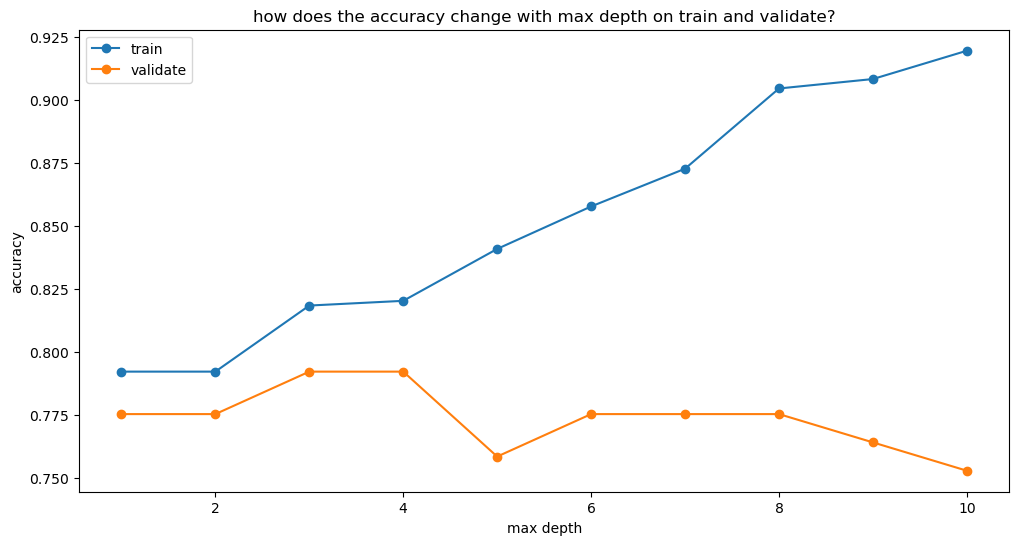

In [114]:
plt.figure(figsize=(12,6))
plt.plot(train_depth, train_score_list, label='train', marker='o')
plt.plot(val_depth, validate_score_list, label='validate', marker='o')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('how does the accuracy change with max depth on train and validate?')
plt.legend()
plt.show()